In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

In [2]:
true_b = 1
true_w = 2
N = 100

# 数据生成
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))
y = true_b + true_w * x + epsilon

In [3]:
# 打乱索引
idx = np.arange(N)
np.random.shuffle(idx)

# 使用前80个索引进行训练
train_idx = idx[:int(N * 0.8)]
# 使用剩余的索引进行验证
val_idx = idx[int(N * 0.8):]

# 生成训练集和验证集
train_x, train_y = x[train_idx], y[train_idx]
val_x, val_y = x[val_idx], y[val_idx]

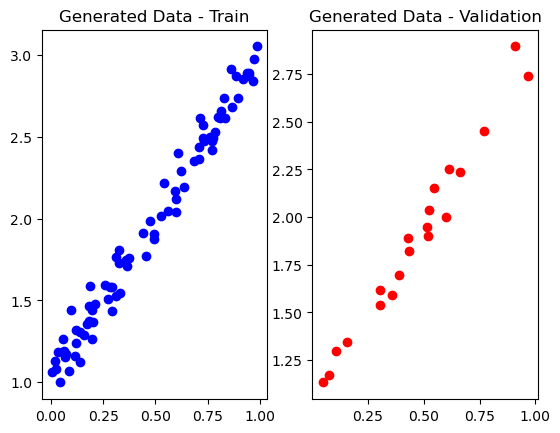

In [4]:
# 使用matplotlib进行画图
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(train_x, train_y, color='blue')
ax1.set_title('Generated Data - Train')
ax2.scatter(val_x, val_y, color='red')
ax2.set_title('Generated Data - Validation')

plt.show()

In [5]:
# 第0步:随机初始化参数b和w
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

b, w

(array([0.49671415]), array([-0.1382643]))

In [6]:
# 第1步：计算模型的预测输出--前向传递
yhat = b + w * train_x

# 第2步：计算损失
error = (yhat - train_y)

# 这是回归，所以计算均方误差（MSE)
loss = (error ** 2).mean()

print(loss)

2.7421577700550976


In [7]:
# 第3步，计算参数b和w的梯度
b_grad = 2 * error.mean()
w_grad = 2 * (error * train_x).mean()
print(b_grad, w_grad)

-3.044811379650508 -1.8337537171510832


In [8]:
# 设置学习率
lr = 0.1
print(b, w)

# 第4步：使用梯度和学习率更新参数
b -= b_grad *lr
w -= w_grad *lr
print(b, w)

[0.49671415] [-0.1382643]
[0.80119529] [0.04511107]


In [9]:
# 使用sklearn中线性回归
linr = LinearRegression()
linr.fit(train_x, train_y)
print(linr.intercept_, linr.coef_)

[1.02354075] [[1.96896447]]


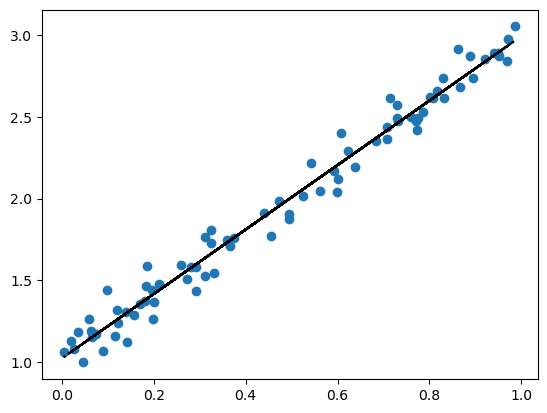

In [10]:
plt.scatter(train_x, train_y)
plt.plot(train_x, linr.coef_ * train_x + linr.intercept_, linestyle='-.', color='k')
plt.show()